In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn

import glob
import sys

from math import *
import pickle

from sklearn.mixture import GaussianMixture

from IPython import display
import time

from PIL import Image

import copy
import subprocess as sp

def tovar(x):
    return torch.cuda.FloatTensor(x)

def toivar(x):
    return torch.cuda.LongTensor(x)

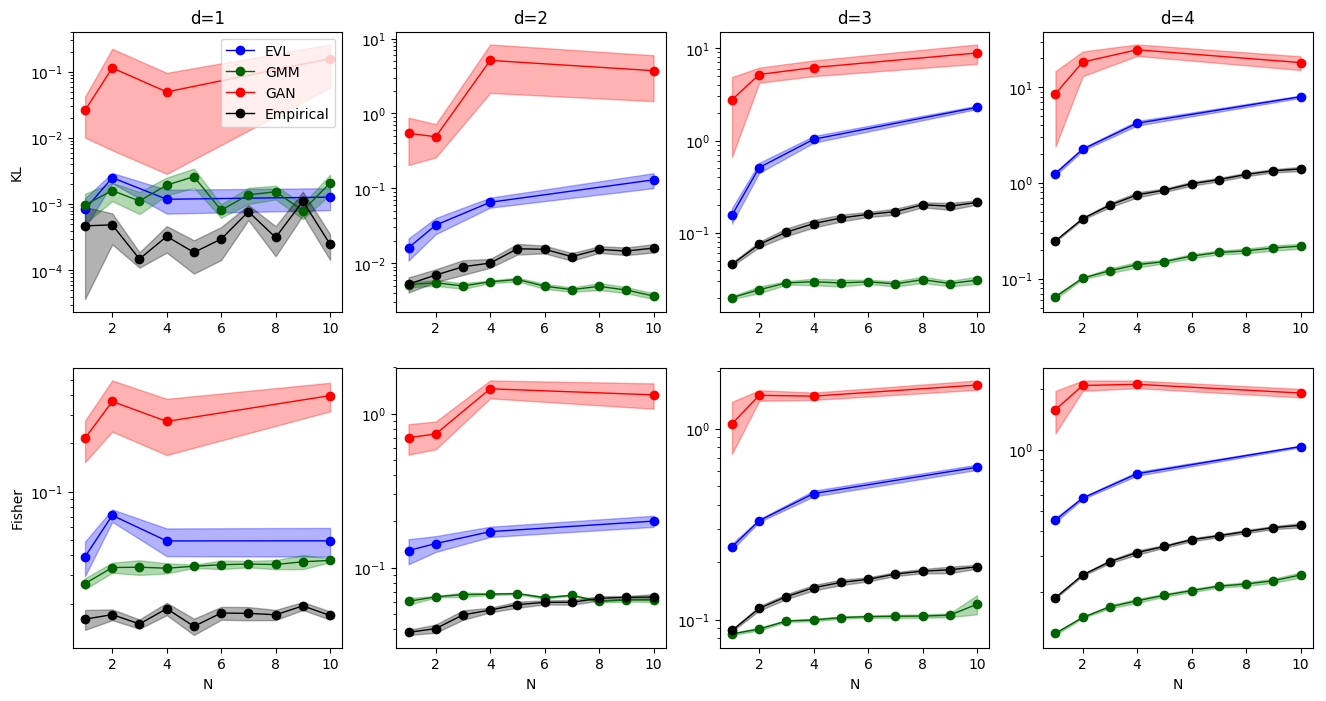

In [8]:
Gmm = np.load("gmm_Ds_50k.npy")
Emm = np.load("emp_Ds_50k.npy")

Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,0]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,0]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,0]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,0]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,0]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,0]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,0])))
        Dstd[d,i] = np.std(np.log(data[:,0]))*np.exp(np.mean(np.log(data[:,0])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,0])))
        UGstd[d,i] = np.std(np.log(data[:,0]))*np.exp(np.mean(np.log(data[:,0])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    #if i==2 or i==3:
    #    plt.xlabel("N")
    if i==0:
        plt.ylabel("KL")
    if i==0:
        plt.legend(loc=1)


Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        Dstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        UGstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,4,i+1+4)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    #plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    #if i==2 or i==3:
    plt.xlabel("N")
    if i==0:
        plt.ylabel("Fisher")
    #if i==1:
    #    plt.legend(loc=1)

plt.gcf().set_size_inches((16,8))
plt.savefig("kldiv_and_fisher.pdf")

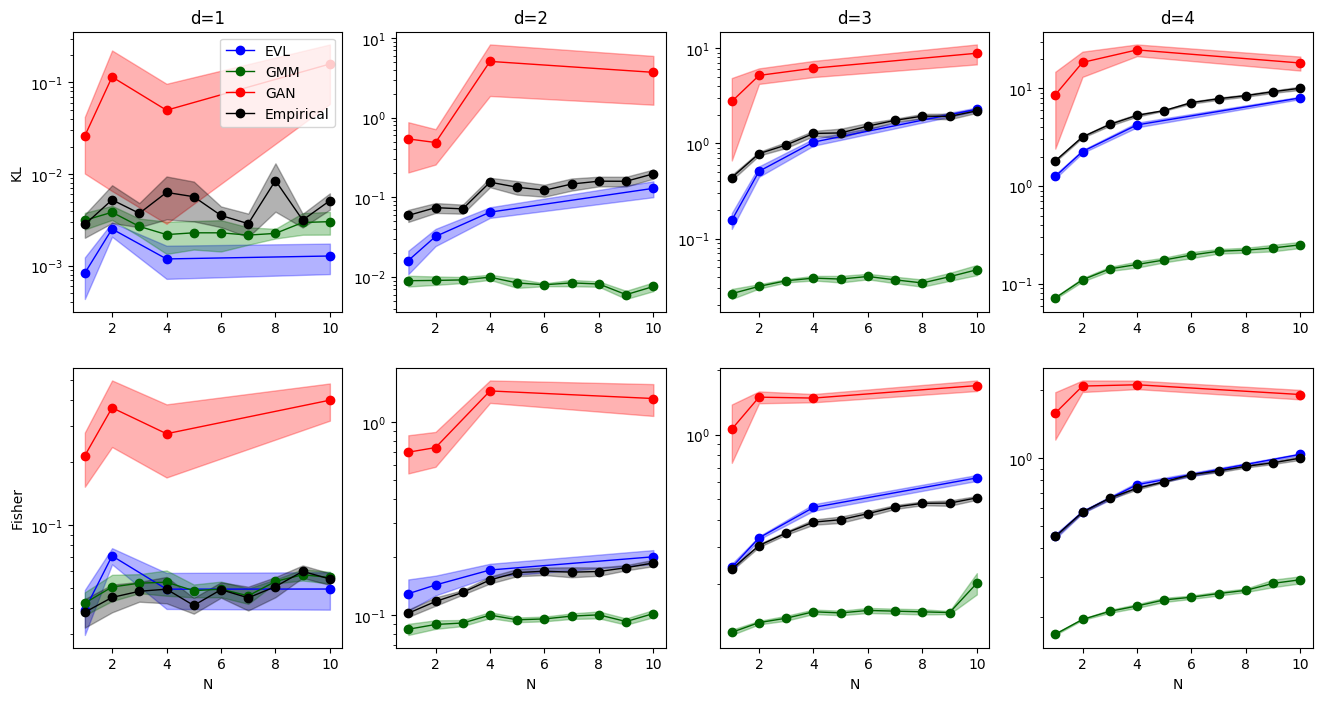

In [9]:
Gmm = np.load("gmm_Ds_5k.npy")
Emm = np.load("emp_Ds_5k.npy")

Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,0]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,0]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,0]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,0]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,0]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,0]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,0])))
        Dstd[d,i] = np.std(np.log(data[:,0]))*np.exp(np.mean(np.log(data[:,0])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,0])))
        UGstd[d,i] = np.std(np.log(data[:,0]))*np.exp(np.mean(np.log(data[:,0])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    #if i==2 or i==3:
    #    plt.xlabel("N")
    if i==0:
        plt.ylabel("KL")
    if i==0:
        plt.legend(loc=1)


Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        Dstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        UGstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,4,i+1+4)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    #plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    #if i==2 or i==3:
    plt.xlabel("N")
    if i==0:
        plt.ylabel("Fisher")
    #if i==1:
    #    plt.legend(loc=1)

plt.gcf().set_size_inches((16,8))
plt.savefig("kldiv_and_fisher_5k.pdf")

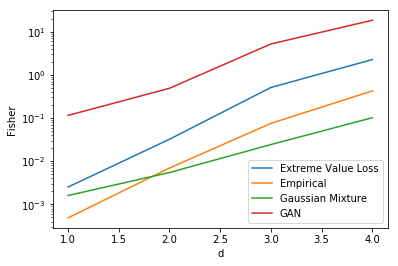

In [3]:
plt.plot(np.arange(1,5),Dmu[:,1],label="Extreme Value Loss")
plt.plot(np.arange(1,5),Emu[:,1],label="Empirical")
plt.plot(np.arange(1,5),Gmu[:,1],label="Gaussian Mixture")
plt.plot(np.arange(1,5),UGmu[:,1],label="GAN")
plt.legend()
plt.xlabel("d")
plt.ylabel("Fisher")
plt.yscale("log")
plt.gcf().set_facecolor("white")
plt.show()

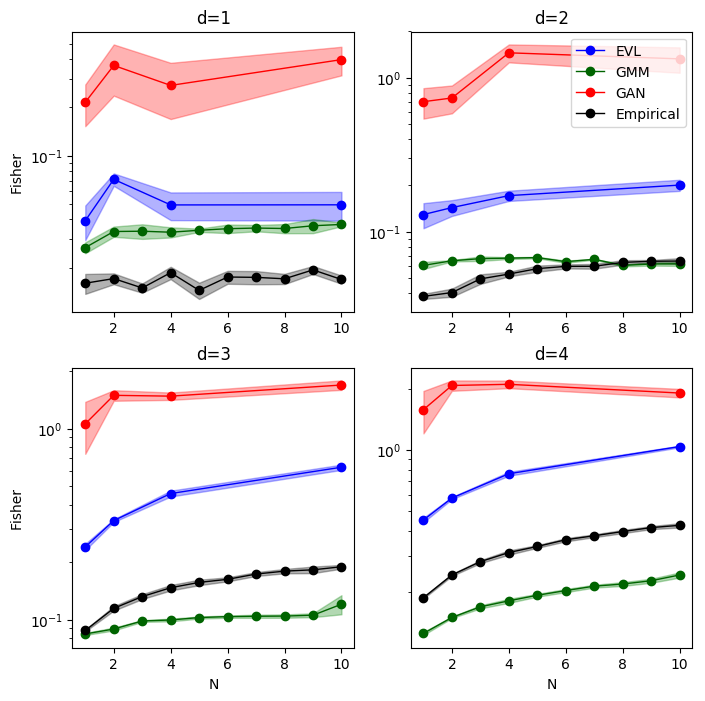

In [4]:
Gmm = np.load("gmm_Ds_50k.npy")
Emm = np.load("emp_Ds_50k.npy")

Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        Dstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        UGstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    if i==2 or i==3:
        plt.xlabel("N")
    if i==0 or i==2:
        plt.ylabel("Fisher")
    if i==1:
        plt.legend(loc=1)
plt.gcf().set_size_inches((8,8))
plt.savefig("fisher.pdf")

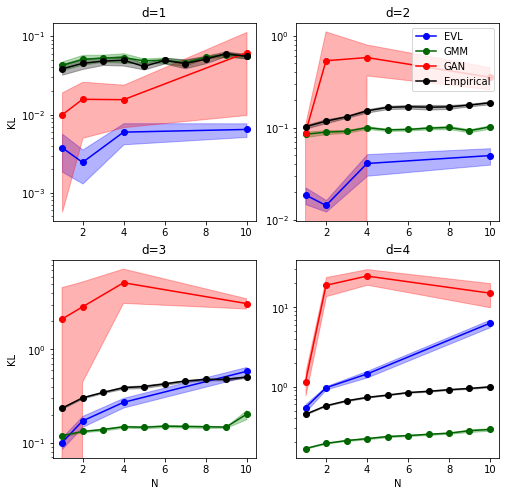

In [10]:
Gmm = np.load("gmm_Ds_5k.npy")
Emm = np.load("emp_Ds_5k.npy")

Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d_5k.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,0])))
        Dstd[d,i] = np.std(np.log(data[:,0]))*np.exp(np.mean(np.log(data[:,0])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d_5k.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,0])))
        UGstd[d,i] = np.std(np.log(data[:,0]))*np.exp(np.mean(np.log(data[:,0])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    if i==2 or i==3:
        plt.xlabel("N")
    if i==0 or i==2:
        plt.ylabel("KL")
    if i==1:
        plt.legend(loc=1)
plt.gcf().set_size_inches((8,8))
plt.show()

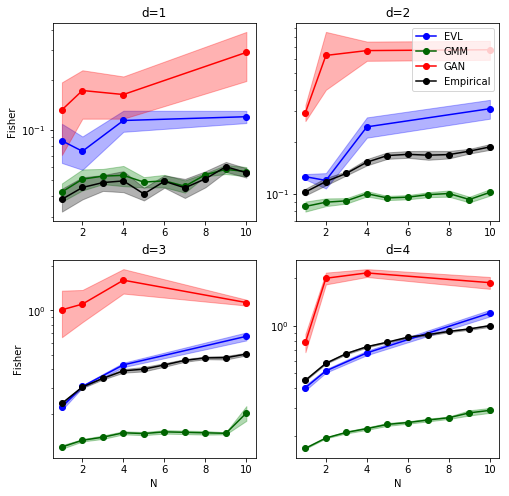

In [11]:
Gmm = np.load("gmm_Ds_5k.npy")
Emm = np.load("emp_Ds_5k.npy")

Gmu = np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))
Gstd = np.std(np.log(Gmm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Gmm[:,:,:,1]), axis=2))/sqrt(4)
GNs = 1+np.arange(10)

Emu = np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))
Estd = np.std(np.log(Emm[:,:,:,1]), axis=2)*np.exp(np.mean(np.log(Emm[:,:,:,1]), axis=2))/sqrt(4)

MNs = [1,2,4,10]

Dmu = np.zeros((4,4))
Dstd = np.zeros((4,4))

UGmu = np.zeros((4,4))
UGstd = np.zeros((4,4))

for d in range(4):
    i = 0
    for N in [1,2,4,10]:
        data = np.loadtxt("minloss_results/d_%d_N_%d_5k.txt" % (d+1,N))
        Dmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        Dstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        data = np.loadtxt("minloss_results/unrolled_d_%d_N_%d_5k.txt" % (d+1,N))
        UGmu[d,i] = np.exp(np.mean(np.log(data[:,3])))
        UGstd[d,i] = np.std(np.log(data[:,3]))*np.exp(np.mean(np.log(data[:,3])))/sqrt(4)
        
        i += 1
        
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.fill_between(MNs, Dmu[i,:]-Dstd[i,:], Dmu[i,:]+Dstd[i,:], color='b', alpha=0.3)
    plt.plot(MNs, Dmu[i,:],'bo-',label="EVL")
        
    plt.fill_between(GNs, Gmu[i,:]-Gstd[i,:], Gmu[i,:]+Gstd[i,:], color='g', alpha=0.3)
    plt.plot(GNs, Gmu[i,:],'o-', label="GMM", color='darkgreen')
    
    plt.plot(MNs, UGmu[i,:],'ro-', label="GAN")
    plt.fill_between(MNs, UGmu[i,:]-UGstd[i,:], UGmu[i,:]+UGstd[i,:], color='r', alpha=0.3)
        
    plt.fill_between(GNs, Emu[i,:]-Estd[i,:], Emu[i,:]+Estd[i,:], color='black', alpha=0.3)
    plt.plot(GNs, Emu[i,:],'o-', color='black', label="Empirical")
    
    plt.yscale("log")
    plt.title("d=%d" % (i+1))
    #plt.ylim(1e-4,3)
    #plt.axhline(-log(1e-32)/400000, color='k', ls='--')# label="KL approx")
    if i==2 or i==3:
        plt.xlabel("N")
    if i==0 or i==2:
        plt.ylabel("Fisher")
    if i==1:
        plt.legend(loc=1)
plt.gcf().set_size_inches((8,8))
plt.show()

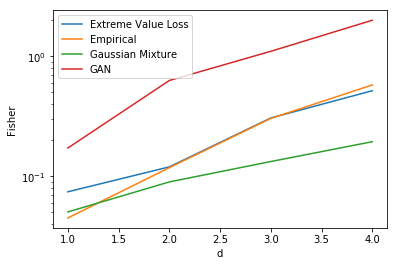

In [12]:
plt.plot(np.arange(1,5),Dmu[:,1],label="Extreme Value Loss")
plt.plot(np.arange(1,5),Emu[:,1],label="Empirical")
plt.plot(np.arange(1,5),Gmu[:,1],label="Gaussian Mixture")
plt.plot(np.arange(1,5),UGmu[:,1],label="GAN")
plt.legend()
plt.xlabel("d")
plt.ylabel("Fisher")
plt.yscale("log")
plt.gcf().set_facecolor("white")
plt.show()

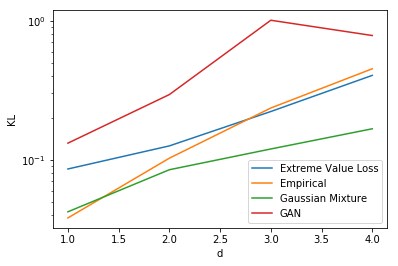

In [14]:
plt.plot(np.arange(1,5),Dmu[:,0],label="Extreme Value Loss")
plt.plot(np.arange(1,5),Emu[:,0],label="Empirical")
plt.plot(np.arange(1,5),Gmu[:,0],label="Gaussian Mixture")
plt.plot(np.arange(1,5),UGmu[:,0],label="GAN")
plt.legend()
plt.xlabel("d")
plt.ylabel("KL")
plt.yscale("log")
plt.gcf().set_facecolor("white")
plt.show()